In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vrindajoshi/TitanicAnalysis/main/titanic3.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Cleaning

In [ ]:
df.info() # we see that cabin, boat, body and home.dest have very few values, so we should drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.shape

(1309, 14)

In [ ]:
print(df[['cabin', 'boat', 'body', 'home.dest']].isna().sum())

cabin        1014
boat          823
body         1188
home.dest     564
dtype: int64


In [ ]:
df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace=True)

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [ ]:
from sklearn.impute import SimpleImputer

fills the NaN values of 'age' column with the mean of that column.

In [ ]:
imputer_age = SimpleImputer(strategy="mean")

df[["age"]] = imputer_age.fit_transform(df[["age"]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S


In [ ]:
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
imputer_embarked = SimpleImputer(strategy="most_frequent")

df[['embarked']] = imputer_embarked.fit_transform(df[['embarked']])

In [ ]:
imputer_fare = SimpleImputer(strategy="median")

df[["fare"]] = imputer_fare.fit_transform(df[["fare"]])

In [ ]:
df.info() # filled all nan values with either the mean, mode or median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

# Data Analysis

<Axes: >

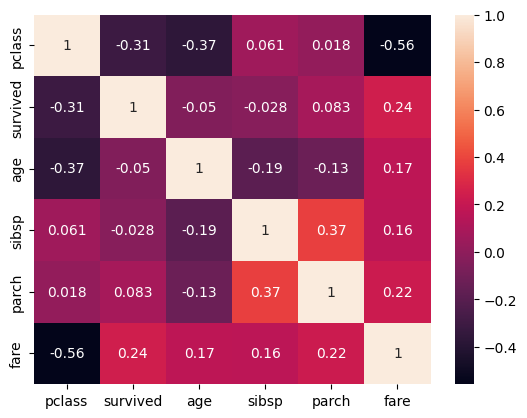

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

we see that there is negative and positive correlation, but not very strong ones.
- A negative correlation is shown between pclass and fare (-0.56), pclass and age (-0.41), and pclass and survived (-0.31).
- A positive correlation is shown between sibsp and parch (0.37), and fare and survived (0.24).

<Axes: xlabel='survived', ylabel='fare'>

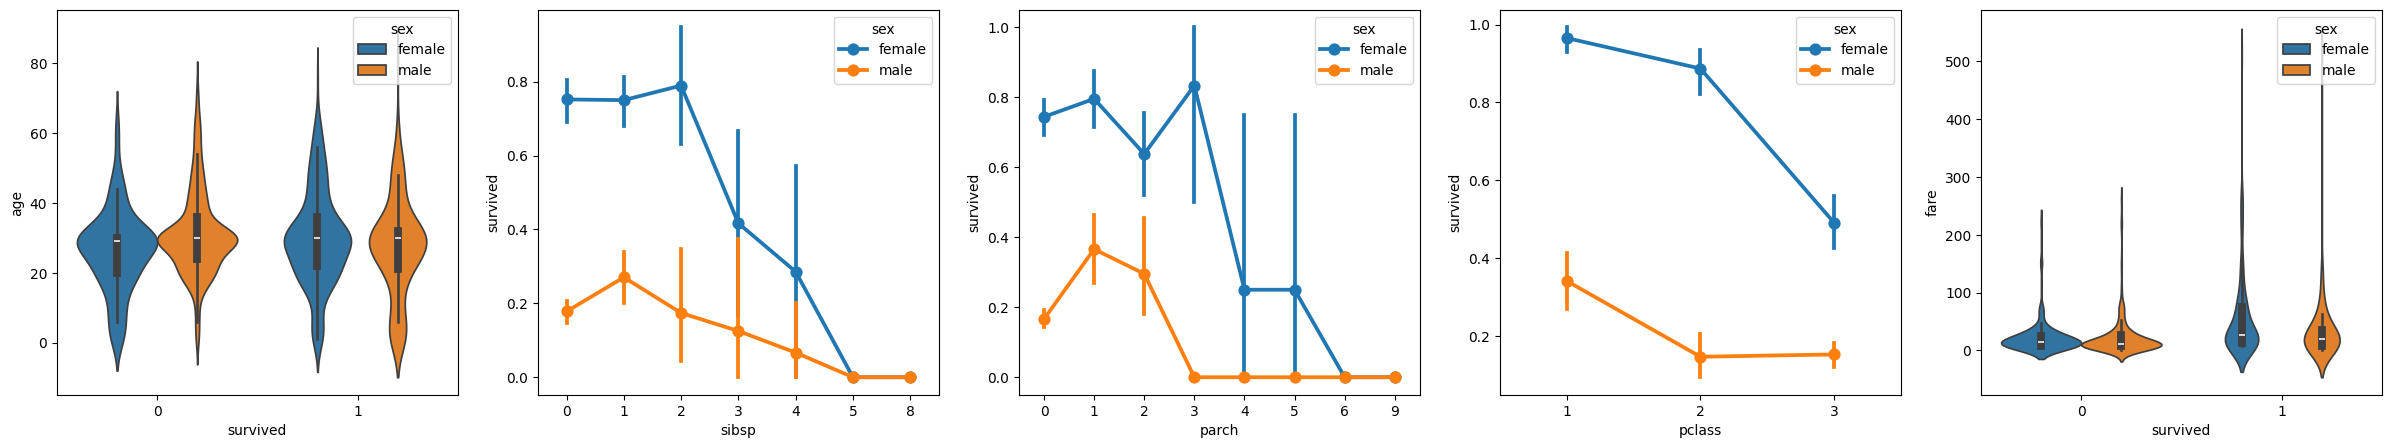

In [ ]:
fig, axs = plt.subplots(ncols = 5, figsize = (30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

In [ ]:
import plotly.express as px

<Axes: xlabel='survived', ylabel='count'>

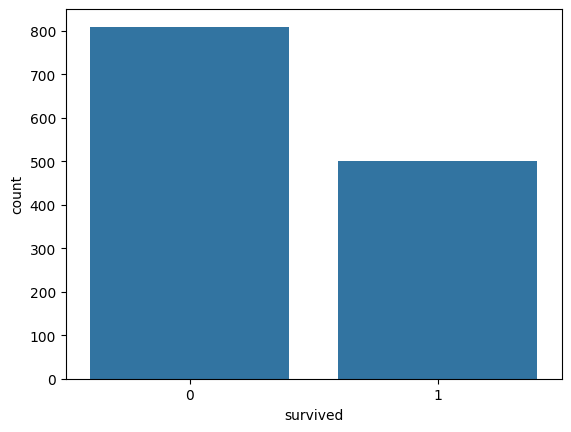

In [ ]:
sns.countplot(x='survived', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

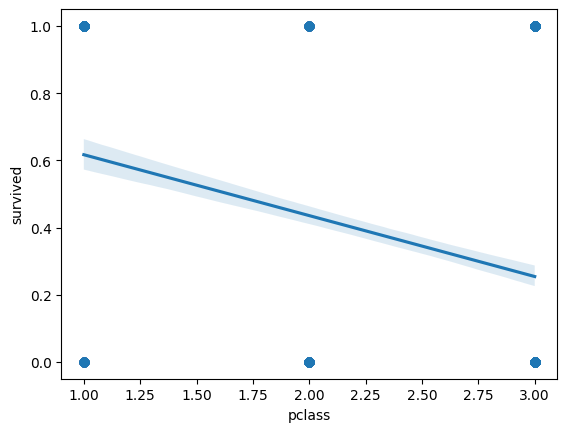

In [ ]:
sns.regplot(x='pclass', y="survived", data=df)

<Axes: xlabel='age', ylabel='survived'>

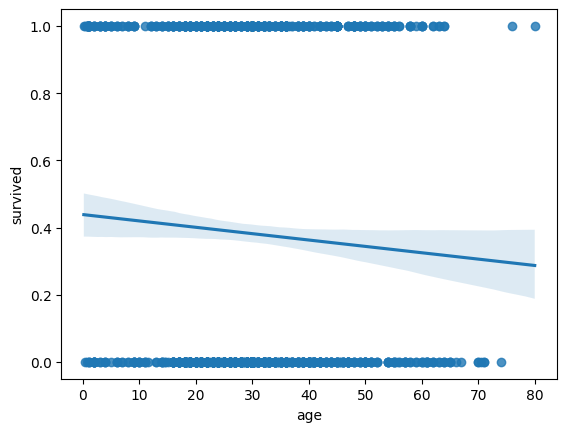

In [ ]:
sns.regplot(x="age", y="survived", data=df)

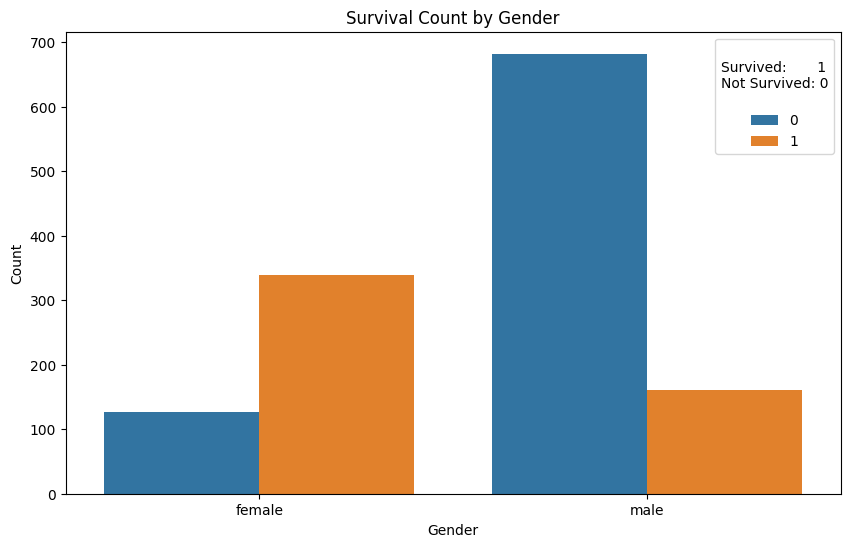

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="""
Survived:       1
Not Survived: 0
""")
plt.show()

In [ ]:
fig = px.bar(df, x='sex', color='survived',
             labels={'sex': 'Gender', 'survived': 'Survived'},
             title='Survival Count by Gender')

fig.update_traces(text=df['survived'], texttemplate='%{text}', textposition='outside')

fig.update_layout(
    autosize=True,
    width=800,
    height=600,
    xaxis_title='Gender',
    yaxis_title='Count',
    xaxis=dict(tickmode='array', tickvals=['female', 'male'], ticktext=['Female', 'Male']),
    showlegend=True
)

fig.show()

# Creating the ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc

StandardScaler()

In [ ]:
X = df.drop(columns=['survived', 'name', 'ticket'], axis=1)
y = df['survived']

In [ ]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.00,0,0,211.3375,S
1,1,male,0.92,1,2,151.5500,S
2,1,female,2.00,1,2,151.5500,S
3,1,male,30.00,1,2,151.5500,S
4,1,female,25.00,1,2,151.5500,S


In [ ]:
X["sex"] = X["sex"].replace(
    {
        "male": 0,
        "female": 1
    }
)



X["embarked"] = X["embarked"].replace(
    {
        'S': 0,
        'C': 1,
        'Q': 2
    }
)

In [ ]:
X.head(), X.shape

(   pclass  sex    age  sibsp  parch      fare  embarked
 0       1    1  29.00      0      0  211.3375         0
 1       1    0   0.92      1      2  151.5500         0
 2       1    1   2.00      1      2  151.5500         0
 3       1    0  30.00      1      2  151.5500         0
 4       1    1  25.00      1      2  151.5500         0,
 (1309, 7))

In [ ]:
y.head(), y.shape

(0    1
 1    1
 2    0
 3    0
 4    0
 Name: survived, dtype: int64,
 (1309,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
model_lo = LogisticRegression()
model_lo

LogisticRegression()

In [ ]:
model_lo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_preds_tr_lo = model_lo.predict(X_train)
f"Logistic Regression Model has an accuracy of {round(np.mean(y_preds_tr_lo == y_train), 4)}% on the training set"

'Logistic Regression Model has an accuracy of 0.7969% on the training set'

In [ ]:
y_preds_te_lo = model_lo.predict(X_test)
f"Logistic Regression Model has an accuracy of {round(np.mean(y_preds_te_lo == y_test), 4)}% on the testing set"

'Logistic Regression Model has an accuracy of 0.8066% on the testing set'

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds_te_lo))

Confusion Matrix:
[[204  20]
 [ 56 113]]


In [ ]:
print("Accuracy Score: ")
print(accuracy_score(y_test, y_preds_te_lo))

Accuracy Score: 
0.806615776081425


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_preds_te_lo))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       224
           1       0.85      0.67      0.75       169

    accuracy                           0.81       393
   macro avg       0.82      0.79      0.80       393
weighted avg       0.81      0.81      0.80       393



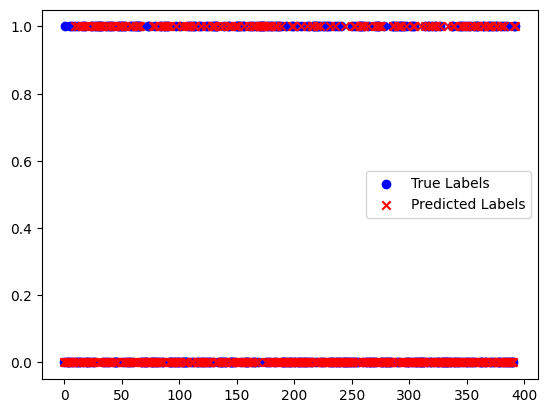

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', marker='o')
plt.scatter(range(len(y_preds_te_lo)), y_preds_te_lo, color='red', label='Predicted Labels', marker='x')
plt.legend()

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds_tr_gnb = model_gnb.predict(X_train)
f"Gaussian Naive Bayes Model has an accuracy of {round(np.mean(y_preds_tr_gnb == y_train), 4)}% on the training set"

'Gaussian Naive Bayes Model has an accuracy of 0.7795% on the training set'

In [ ]:
y_preds_te_gnb = model_gnb.predict(X_test)
f"Gaussian Naive Bayes Model has an accuracy of {round(np.mean(y_preds_te_gnb == y_test), 4)}% on the testing set"

'Gaussian Naive Bayes Model has an accuracy of 0.7659% on the testing set'

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds_te_gnb))

print()
print()

print("Accuracy Score: ")
print(accuracy_score(y_test, y_preds_te_gnb))

print()
print()

print("Classification Report:")
print(classification_report(y_test, y_preds_te_gnb))

Confusion Matrix:
[[186  38]
 [ 54 115]]


Accuracy Score: 
0.7659033078880407


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       224
           1       0.75      0.68      0.71       169

    accuracy                           0.77       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.76      0.77      0.76       393



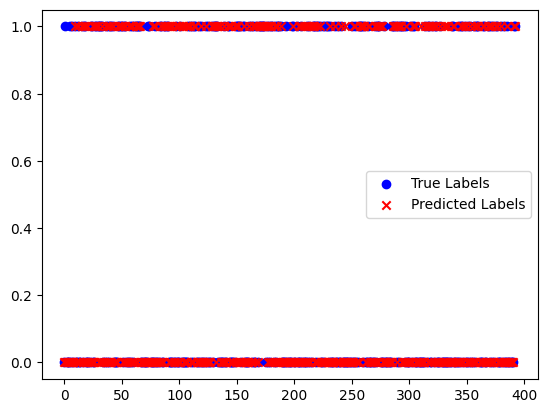

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', marker='o')
plt.scatter(range(len(y_preds_te_gnb)), y_preds_te_gnb, color='red', label='Predicted Labels', marker='x')
plt.legend()

## Neural Network (Keras)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# I start by creating a Sequential model.
# This model allows me to add layers in a simple, linear sequence.
model_keras_nn = Sequential()

# Next, I add the first Dense layer.
# This layer has 5 neurons and uses the ReLU activation function.
# I initialize the weights uniformly with `kernel_initializer='uniform'`.
# I specify that the input data has 7 features with `input_dim=7`.
model_keras_nn.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=7)) # Changed input_dim to 7

# Then, I add the second Dense layer.
# This layer also has 5 neurons and uses the ReLU activation function.
# I don’t need to specify `input_dim` here since this is not the input layer.
model_keras_nn.add(Dense(5, kernel_initializer='uniform', activation='relu'))

# Now, I add the output Dense layer.
# This layer has 1 neuron and uses the sigmoid activation function.
# The sigmoid function is great for binary classification tasks where I need to predict one of two outcomes.
model_keras_nn.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# After building the model, I compile it.
# I use the Adam optimizer to adjust the weights during training.
# I choose the binary_crossentropy loss function because I’m working on a binary classification problem.
# I also want to track the accuracy of the model, so I include `metrics=['accuracy']`.
model_keras_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# I then train the model with the training data.
# `X_train` is the set of features, and `y_train` contains the labels.
# I set `batch_size=10` to update the model weights every 10 samples.
# I train the model for `epochs=100`, meaning it will go through the entire dataset 100 times.
model_keras_nn.fit(X_train, y_train, batch_size=10, epochs=100)

# Once training is complete, I make predictions using the test data (`X_test`).
# I round the predictions to the nearest integer (0 or 1) using `np.rint()`.
# I also flatten the predictions to make them a 1D array.
y_pred_keras_nn = np.rint(model_keras_nn.predict(X_test).flatten())

# Finally, I evaluate the model.
# I compare the predicted values (`y_pred`) to the actual values (`y_test`).
# I use `accuracy_score` to determine how many predictions were correct.
# I print the accuracy to see how well the model performed.
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_keras_nn)) # Use y_pred_keras_nn

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6452 - loss: 0.6904
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6275 - loss: 0.6635
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6356 - loss: 0.6253
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6327 - loss: 0.6245
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6589 - loss: 0.5972
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6546 - loss: 0.5895
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6468 - loss: 0.5997
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6409 - loss: 0.6030
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6397 - loss: 0.5949
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6292 - loss: 0.5756
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6374 - loss: 0.5803
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6885 - l

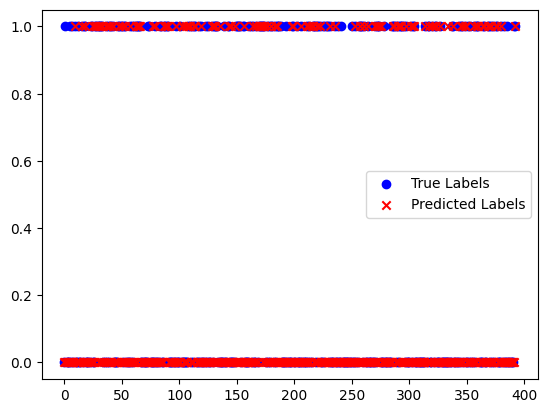

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', marker='o')
plt.scatter(range(len(y_pred_keras_nn)), y_pred_keras_nn, color='red', label='Predicted Labels', marker='x')
plt.legend()